In [1]:
from sympy import *
import numpy as np
import numpy.linalg as LA
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
 
from relvlingam.ReLVLiNGAM import *
from relvlingam.simulate_data import all_settings, simulate_data
from relvlingam.DAG import plot_dag

np.random.seed(42)

```all_settings``` contains the six settings considered in the paper.

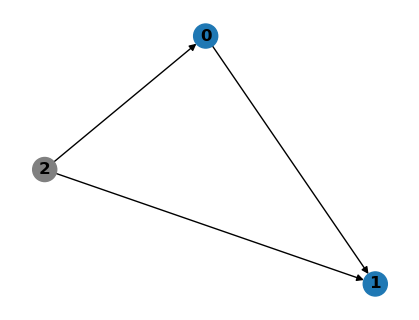

In [2]:
n = 100000
noise_distribution = 'gamma'
setting = all_settings['a']
Lambda, Gamma, highest_l = setting['Lambda'], setting['Gamma'], setting['highest_l']
p = Lambda.shape[0]
q = p + Gamma.shape[1]
plot_dag(np.hstack((Lambda, Gamma))) # Latent nodes are grey

In [3]:
X, true_B = simulate_data(n, noise_distribution=noise_distribution, Lambda=Lambda, Gamma=Gamma, permute_order=True)
lingam = ReLVLiNGAM(X, highest_l)
lingam.fit(X)

# Find best permutation
lingam.fitted = True
B_hat = lingam.B
all_possible_permutations = lingam.get_all_possible_permutations()
min_q = min(B_hat.shape[1], q)
best_permutation = all_possible_permutations[np.argmin([LA.norm(np.nan_to_num(B_hat[:,perm[:min_q]] - true_B[:,:min_q])) for perm in all_possible_permutations])]
best_B_hat = B_hat[:,best_permutation]
# Compare with true B
best_B_hat - true_B

array([[0.        , 0.01010304, 0.08031963],
       [0.        , 0.        , 0.        ]])